In [3]:
import pandas as pd
import numpy as np
import os

In [6]:
#list with all landuses
dictionary_landuse = [
    "non-assigned",
    "commercial",
    "construction",
    "education",
    "fairground",
    "industrial",
    "residential",
    "retail",
    "institutional",
    "aquaculture",
    "allotments",
    "farmland",
    "farmyard",
    "paddy",
    "animal_keeping",
    "flowerbed",
    "forest",
    "greenhouse_horticulture",
    "meadow",
    "orchard",
    "plant_nursery",
    "vineyard",
    "basin",
    "salt_pond",
    "brownfield",
    "cemetery",
    "depot",
    "garages",
    "grass",
    "greenfield",
    "landfill",
    "military",
    "port",
    "quarry",
    "railway",
    "recreation_ground",
    "religious",
    "village_green",
    "winter_sports",
]

# Distribution of labels

In [9]:
# go through all masks and count the occurances of the labels
datanames = os.listdir(os.getcwd() + os.sep + "Data" + os.sep + "Masks")
counter = {i: 0 for i in range(39)}
for dataname in datanames:
    numpyfile = np.load(os.getcwd() + os.sep + "Data" + os.sep + "Masks" + os.sep + dataname)
    data = numpyfile.f.arr_0
    numpyfile.close()
    data = data.astype(int)
    unique, counts = np.unique(data, return_counts=True)
    combined = dict(zip(unique, counts))
    for key in combined:
        counter[key] += combined[key] 

In [14]:
# sort from lowest to highest percentage
sorted_counter = dict(sorted(counter.items(), key=lambda x:x[1]))

In [27]:
# calculate the percentages
total = len(datanames) * 640 * 640
for x in range(len(sorted_counter)):
    print(dictionary_landuse[list(sorted_counter.keys())[x]] + " represents " + str(np.round((sorted_counter[list(sorted_counter.keys())[x]]/total)*100, decimals=2)) + " percent of the data")

animal_keeping represents 0.0 percent of the data
port represents 0.0 percent of the data
fairground represents 0.0 percent of the data
institutional represents 0.0 percent of the data
flowerbed represents 0.0 percent of the data
depot represents 0.0 percent of the data
aquaculture represents 0.0 percent of the data
salt_pond represents 0.01 percent of the data
paddy represents 0.01 percent of the data
basin represents 0.02 percent of the data
landfill represents 0.03 percent of the data
religious represents 0.03 percent of the data
village_green represents 0.04 percent of the data
plant_nursery represents 0.04 percent of the data
garages represents 0.04 percent of the data
education represents 0.04 percent of the data
greenfield represents 0.04 percent of the data
greenhouse_horticulture represents 0.04 percent of the data
brownfield represents 0.06 percent of the data
winter_sports represents 0.06 percent of the data
quarry represents 0.19 percent of the data
construction represents 

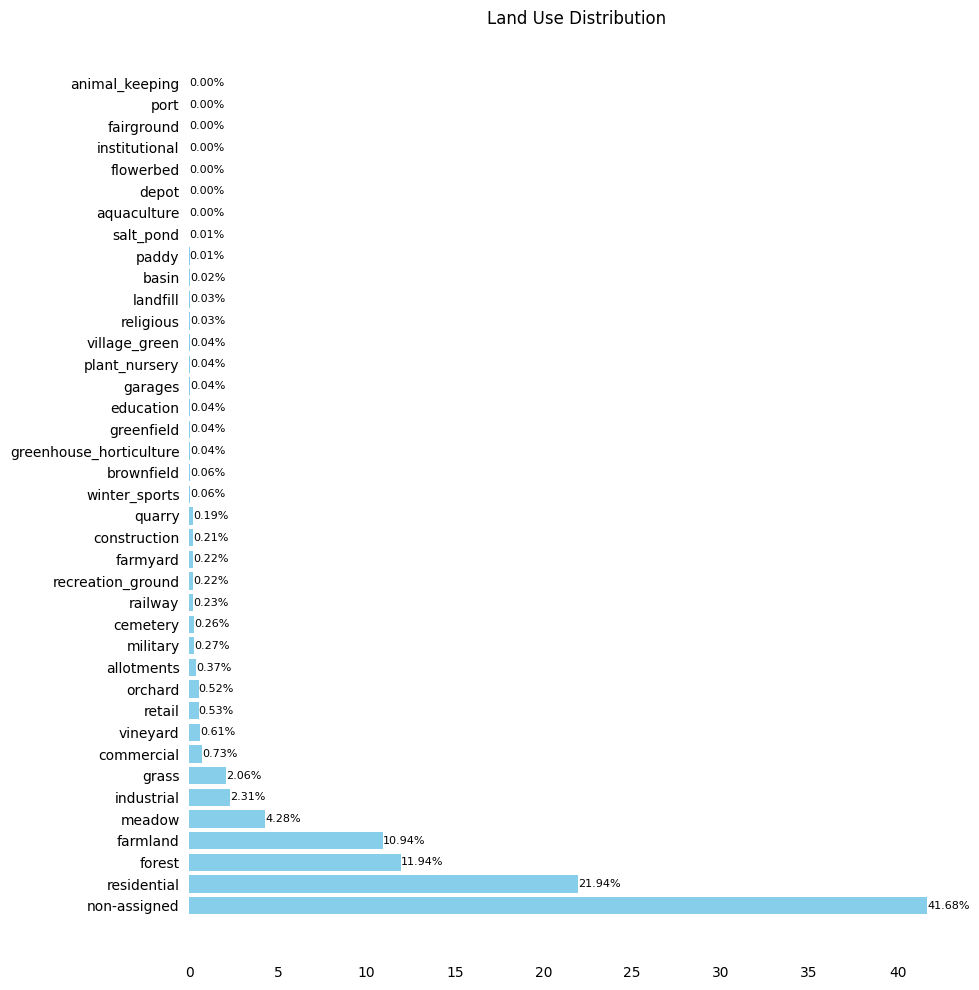

In [57]:
import matplotlib.pyplot as plt

land_use_data = counter

# Calculate total value of data
total_value = len(datanames) * 640 * 640

# Calculate percentages
land_use_percentages = {
    label: (value / total_value) * 100 for label, value in land_use_data.items()
}

# Sort the data
sorted_data = sorted(land_use_percentages.items(), key=lambda x: x[1])
labels, values = zip(*sorted_data)

# Map label value to the landuse text
text_labels = [dictionary_landuse[label] for label in labels]

fig, ax = plt.subplots(figsize=(10, 12))
y_pos = np.arange(len(labels))
bars = ax.barh(y_pos, values, align="center", color="skyblue")

# Display percentage values after the bars
for bar, value in zip(bars, values):
    ax.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{value:.2f}%",
        va="center",
        ha="left",
        fontsize=8,
    )

# Remove x-axis
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(
    axis="both",
    which="both",
    left=False,
    right=False,
    bottom=False,
    top=False,
    labelleft=True,
)

ax.set_yticks(y_pos)
ax.set_yticklabels(text_labels)
ax.invert_yaxis()

# Added title
plt.title("Land Use Distribution")

# Show the plot
plt.show()

As some data isn't often mapped oder also doesn't exist that often in reality, the data is shifted to represent that fact. Tests can be done, if a more equal distribution impacts the model postively or negatively.

# Distribution of Countries

In [32]:
import geocoder

datanames = os.listdir(os.getcwd() + os.sep + "Data" + os.sep + "Masks")

countries = []

#query in which country the coordinates lie
for dataname in datanames:
    try:
        coordinates = dataname.rstrip(".npz").split("_")
        data = geocoder.osm([coordinates[0], coordinates[1]], method="reverse")
        countries.append(data.json["country"])
    except:
        countries.append("not_found")
        

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

# Sample data (replace this with your actual data)
total_countries = len(countries)

# Count the occurrences of each country
country_counts = Counter(countries)

# Calculate the percentage distribution
percentages = [(count / total_countries) * 100 for count in country_counts.values()]
country_names = list(country_counts.keys())

# Create a bar chart
plt.bar(country_names, percentages)
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Countries in the List')
plt.show()

NameError: name 'countries' is not defined

# Worldmap of all used coordinates

In [4]:
# load all the lat and lng tuples from the filenames
datanames = os.listdir(os.getcwd() + os.sep + "Data" + os.sep + "Masks")
coordinates = []
for dataname in datanames:
    coordinate = dataname.rstrip(".npz").split("_")
    coordinates.append(coordinate)

In [6]:
import folium
from folium.plugins import MarkerCluster

# create a folium map
map_center = [0, 0]
map = folium.Map(location=map_center, zoom_start=2, world_copy_jump=True)

# Create a MarkerCluster for the data points
marker_cluster = MarkerCluster().add_to(map)

# add the markers for each data point
for city_data in coordinates:
    folium.Marker(
        location=[city_data[0], city_data[1]],
        icon=folium.Icon(color="blue"),
    ).add_to(marker_cluster)

map